In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:

MACHINE_PROBABILITY = [0.2, 0.4, 0.6, 0.8]

In [56]:
class Machine:
    def __init__ (self, p):
        self.p = p
        self.N = 0
        self.WR = 0
    def pull(self):
        return np.random.random() < self.p
    def update(self,reward):
        self.N += 1
        self.WR = ((self.N - 1) * self.WR + reward) / (self.N)

In [87]:
def run_experiment(m1, m2, m3, m4, EPS, ITERATION_NUMBER):
    rewards = np.zeros(ITERATION_NUMBER)
    explorationNum = 0
    exploitationNum = 0
    optimalSelectionNum = 0
    reward = 0
    
    machines = [Machine(m1), Machine(m2), Machine(m3), Machine(m4)]
    
    for i in range (ITERATION_NUMBER):
        rndNum = np.random.random()
        if rndNum < EPS:
            # exploration
            selectedMachine = np.random.randint(len(machines))
            explorationNum += 1
        else:
            # exploitation
            selectedMachine = np.argmax([m.WR for m in machines])
            exploitationNum += 1

        if selectedMachine == optimalMachine:
            optimalSelectionNum += 1

        reward = machines[selectedMachine].pull()
        rewards[i] = reward
        machines[selectedMachine].update(reward)
    
    cumulative_rewards = np.cumsum(rewards)
    cumulative_win_rate = cumulative_rewards /(np.arange(ITERATION_NUMBER)+1)
    labelStr = str("epsilon = " + str(EPS))
    plt.plot(cumulative_win_rate , label = labelStr)
    plt.plot(np.ones(ITERATION_NUMBER)* m1)
    plt.plot(np.ones(ITERATION_NUMBER)* m2)
    plt.plot(np.ones(ITERATION_NUMBER)* m3)
    plt.plot(np.ones(ITERATION_NUMBER)* m4)
    plt.xscale('log')
    plt.legend()
    plt.show()

    return cumulative_win_rate


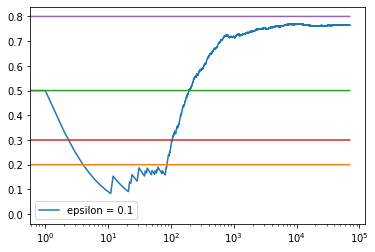

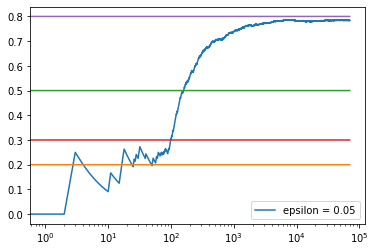

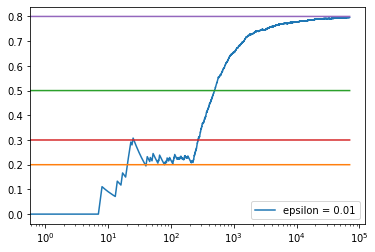

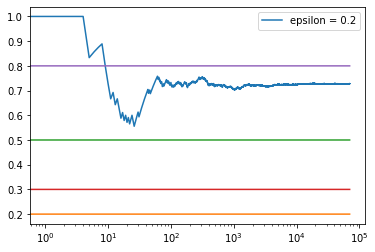

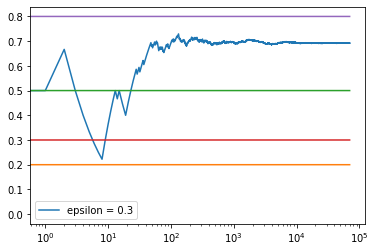

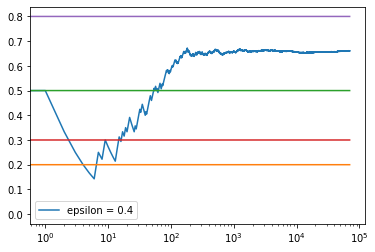

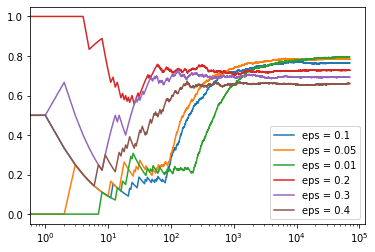

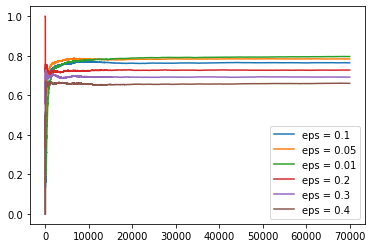

In [88]:
m1, m2, m3, m4 = 0.2 ,0.5, 0.3, 0.8
iterNum = 70000
c_1 = run_experiment(m1,m2,m3,m4,0.1,iterNum)
c_05 = run_experiment(m1,m2,m3,m4,0.05,iterNum)
c_01 = run_experiment(m1,m2,m3,m4,0.01,iterNum)
c_2 = run_experiment(m1,m2,m3,m4,0.2,iterNum)
c_3 = run_experiment(m1,m2,m3,m4,0.3,iterNum)
c_4 = run_experiment(m1,m2,m3,m4,0.4,iterNum)
#log scale plot

plt.plot(c_1, label = 'eps = 0.1')
plt.plot(c_05, label = 'eps = 0.05')
plt.plot(c_01, label = 'eps = 0.01')
plt.plot(c_2, label = 'eps = 0.2')
plt.plot(c_3, label = 'eps = 0.3')
plt.plot(c_4, label = 'eps = 0.4')
plt.legend()
plt.xscale('log')
plt.show()

#linear plot
plt.plot(c_1, label = 'eps = 0.1')
plt.plot(c_05, label = 'eps = 0.05')
plt.plot(c_01, label = 'eps = 0.01')
plt.plot(c_2, label = 'eps = 0.2')
plt.plot(c_3, label = 'eps = 0.3')
plt.plot(c_4, label = 'eps = 0.4')
plt.legend()
plt.show()